# Tensorflow와 Keras

Tensorflow - 구글에서 만든 Framework



# Keras

고성능 딥러닝 라이브러리

구글에서 만든 프레임워크인 Tensorflow안에서 Keras가 동작

# Tensorflow가 있는데 Keras도 필요한 이유?

Tensorflow는 입문자에게는 상당히 고난이도

반면에, Keras는 사용자(개발자) 친화적으로 만들어져있어서 상대적으로 사용이 간편함

단순한 신경망 구성 등 기존에 있는 것만으로 개발이 가능하다면 Keras만으로도 충분하지만,

디테일한 조종 등에서는 한계가 있어서 Tensorflow와 같이 사용하면 조금 더 좋은 개발이 가능

In [1]:
import tensorflow as tf

In [2]:
# mnist 데이터 확보
mnist = tf.keras.datasets.mnist

In [4]:
# train_data, test_data 나누기
train_data, test_data = tf.keras.datasets.mnist.load_data()
# tf.keras.datasets.mnist.load_data() :
#     학습용 데이터, 테스트용 데이터를 각각 (feature, label) 형태로 반환

(img_train, label_train) = train_data
(img_test, label_test) = test_data

# 데이터 확인
print(train_data) # 학습용 데이터
print()
print(test_data) # 테스트용 데이터

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

In [6]:
print(img_train.shape)
print(label_train.shape)
print(img_test.shape)
print(label_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
img = img_train[150]
img.shape

(28, 28)

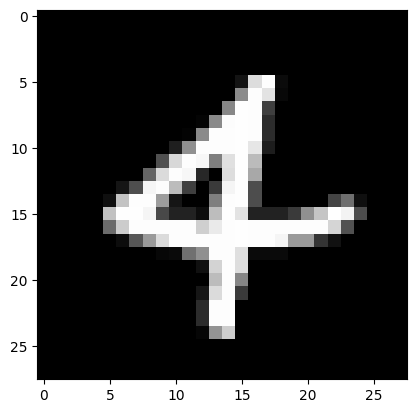

In [15]:
import matplotlib.pyplot as plt

plt.imshow(img, 'gray')
plt.show()

# 딥러닝 프로세스 (Deep Learning Process)

  1. 데이터 로드
  2. 데이터 전처리 (Data Preprocessing)

  Data를 Model에 입력하기 전에 데이터를 '가공'하는 단계

  가지고 있는 데이터 종류, 모델에 적용하려는 훈련 방법 등에 따라서 전처리 방법은 천차만별!!

  경우에 따라서는 배열의 차원에 변경이 이루어지고, 스케일의 조정이 이루어지기도 함

  데이터 전처리를 제대로 진행해야 다음에 진행할 모델 생성에서 올바르게 모델 정의를 할 수 있음

  3. 데이터 분할 ( 학습용, 테스트용)
  4. 모델 생성

  모델의 구조를 파악하고 만들어내는 단계

  - 모델 생성 방법
    - Sequential API : 순차적 구조의 모델
    - Functional API : 다중 입력, 출력을 가지고 있는 복잡한 구조의 모델

  5. 모델 컴파일 (Compile)

  만들어진 모델 훈련에 사용할 다양한 옵션 설정

  .compile() 함수를 사용
    - 손실함수(loss)
    - 옵티마이저(optimizer)
    - 평가지표(metrics)

  6. 모델 훈련

  .fit() 함수에 모델 훈련에 필요한 정보를 파라미터로 전달

    - 훈련 데이터셋
    - 검증 데이터셋
    - 크기(반복 횟수)
    - 콜백(call-back)

  7. 모델 검증 (evaluate)

  훈련이 끝난 모델이 얼마나 정확한지 검증하는 단계

  모델 훈련시에 사용하지 않은 데이터셋을 입력시킨 후에, 그 모델이 예측한 값과 정답을 비교해서 평가지표

  이 검증결과를 바탕으로 모델 생성단계로 돌아가서 컴파일, 모델 수정 등이 이루어짐

  목표한 성능에 도달할 때까지 계속해서 과정이 반복(4번부터)

  8. 예측 (predict)

  임의의 데이터 or test용 데이터를 입력해서 모델 예측값을 얻는 과정

  # 2, 3, 4, 5번의 경우에는 모델 학습을 위한 필수 프로세스로 절대 빼먹어서는 안됨!!!

In [16]:
(train_data, train_label), (test_data, test_label) = mnist.load_data()

In [17]:
(train_data, train_label), (test_data, test_label)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [18]:
# 이미지 한장의 픽셀값의 최대, 최소값
print(train_data.min()) # 최소값 : 0
print(train_data.max()) # 최대값 : 255

0
255


In [20]:
# 이미지에 대한 내용을 정규화
train_data, test_data = train_data / train_data.max(), test_data / train_data.max()

print(test_data.shape) # (10000, 28, 28) : 데이터 값의 범위는 축소 됨, 원본 배열 형태는 그대로
# 10000 : 데이터셋의 크기 / (28, 28) : 이미즹 크기

train_data[0, 5:10, 5:10] # 정규화 후의 데이터는 모두 0 ~ 1 사이

# 정규화 : 데이터 값의 전체 범위를 0 ~ 1 사이의 값으로 조정하는 것

(10000, 28, 28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.11764706, 0.14117647],
       [0.        , 0.        , 0.19215686, 0.93333333, 0.99215686],
       [0.        , 0.        , 0.07058824, 0.85882353, 0.99215686],
       [0.        , 0.        , 0.        , 0.31372549, 0.61176471]])

In [22]:
# 모델 생성
# Sequential() : 순차적 구조의 모델 >> 구조를 설정하고, 층(layer)을 설정하는 부분

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 1차원(vector)으로 평평하게 만들기
    # input_shape << 꼭 설정해야함 !
    # (28, 28) 크기의 matrix가 들어갈테니 이걸 1차원 vector로 펴달라는 뜻
    tf.keras.layers.Dense(128, activation='relu'),
    # 중간층(은닉층)에 신경망을 만드는 단계
    # (128개짜리 퍼셉트론으로 구성되는 layer하나)
    # activation='relu' : 은닉층의 활성화 함수
    tf.keras.layers.Dropout(0.2),
    # 과대적합을 막아주는 역할
    # 128개의 신경망 중에 무작위로 20%는 0으로 만들어 줌
    tf.keras.layers.Dense(10, activation='softmax')
    # 10개의 퍼셉트론으로 만든 layer
    # 10개로 구성한 이유 ?
    #   : 0 ~ 9까지 총 10개의 이미지가 어떤 숫자를 의미하는지 파악하기 위해서
    # activation='softmax' : 출력층의 결과 값을 다중 분류를 위한 확률 값으로 계산 할 수 있도록!

    # 활성화 함수 (activation) : 결과값을 변환해서 다른층으로 보내주는 함수

    # linear : 기본값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력
    # relu : 은닉(중간)층에서 주로 사용
    # sigmoid : 이진분류 - 출력층에서 주로 사용
    # softmax : 다중분류 - 출력층에서 주로 사용
])
print(model.summary()) # 모델의 구조 확인

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
# 컴파일
# .compile : 학습 방법에 대한 설정
#   Sequential()에서 정해진 모델을 컴퓨터가 알아들을 수 있는 말로 컴파일하는 부분
model.compile(
    optimizer = 'adam',
    # 최적화하기
    # 옵티마이저는 손실함수를 통해서 얻어낸 손실값으로부터 모델을 업데이트하는 방식
    # 그 중에서 adam이라는 옵티마이저를 사용

    loss='sparse_categorical_crossentropy',
    # 손실함수(loss function) : 모델을 최적화시킬때 사용하는 함수
    # 손실함수는 신경망의 예측이 얼마나 잘 맞는지 측정하는 역할
    # categorical_crossentropy : 다중분류 손실함수 (one-hot encoding 클래스)
    #   출력값이 one-hot encoding 된 결과
    # sparse_categorical_crossentropy : 다중분류 손실함수 (one-hot encoding이 아닌)
    #   출력값이 integer type 클래스로 반환
    # binary_crossentropy : 클래스가 2개인 이진 분류 손실함수
    #   label이 0 or 1을 값으로 가질 때 사용
    metrics=['accuracy'] # 정확도 확인
)

# 용어

# 하이퍼파라미터(hyper-parameter)

머신러닝이나 딥러닝에서 훈련을 시킬 때

조금 더 나은 조건에 훈련할 수 있도록 [사용자가 직접] 설정해주는 옵션

학습 속도, 반복 횟수, ... 등은 사용자가 직접 설정

---
어떤 값을 어떻게 설정하는지에 다라서 그 모델의 성능이나 결과가 달라짐

사용자가 따로 건들지 않으면 자동적으로 default값이 적용됨

# 에포크 (epoch)

반복 횟수 지정

데이터를 학습시키는 과정을 몇 번 반복해서 모델이 최적의 가중치를 찾아낼 수 있도록 설정하는 방법

# 과소적합 (underfitting) vs 과대적합(overfitting)

모델 학습에 있어서는 데이터는 크게

학습용 데이터 / 테스트(예측)할 데이터로 구분

반복적으로 학습을 시키면 모델은 사람이 발견하기 어려운 패턴을 발견하게 되어서 사람의 예측 성능보다 우월한 모델 생성이 가능

예측용 데이터가 학습시킨 모델과는 다른 데이터의 분포를 가지고 있거나, 학습 시킨 데이터가 한 쪽으로 치우친(편향된) 데이터라면... => 그 모델은 예측 성능이 현저하게 떨어지게 됨...

- 과소적합 : 모델이 충분히 학습을 하지 못한 경우 => 예측 성능 저하
- 과대적합 : 학습데이터를 지나치게 많이 반복학습을 시킨 경우 => 편향된 모델

=> 이 두 문제를 최소화하면서 정확도를 높일 수 있도록 해야함!

In [27]:
# training, evaluation(훈련, 검증)
#   .fit() : model을 실제로 학습시키는 단계
model.fit(train_data, train_label, epochs=10) # 6만개의 데이터를 10번 반복 훈련하겠다

# 훈련데이터에서 사용하지 않았던 (test_data, test_label)로 검증/평가
model.evaluate(test_data, test_label)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9637 - loss: 0.1212
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9720 - loss: 0.0922
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9752 - loss: 0.0779
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9797 - loss: 0.0655
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0567
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9828 - loss: 0.0536
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9858 - loss: 0.0444
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9858 - loss: 0.0429
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9883 - loss: 0.0371
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9885 - loss: 0.0362
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0829


[0.0703490749001503, 0.9793999791145325]

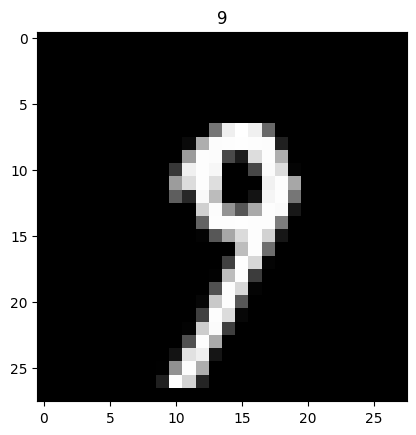

In [34]:
import numpy as np
# data 탐색
# 훈련용데이터의 길이만큼의 숫자 중에 랜덤한 숫자 하나 뽑아오기
index = np.random.randint(len(train_data))

# 해당하는 숫자가 있는 train_data의 데이터를 img2라는 변수에 넣음
img2 = train_data[index]

plt.imshow(img2, 'gray')
plt.title(train_label[index])
plt.show()

# 내가 만든 그림으로 확인하기

그림판으로 숫자하나 그려서 저장

그림판 크기 => (28, 28)

In [35]:
import os
from PIL import Image
from google.colab import files

upload = files.upload()

Saving num.png to num.png


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=28x28 at 0x7AFCD2CDFE80>


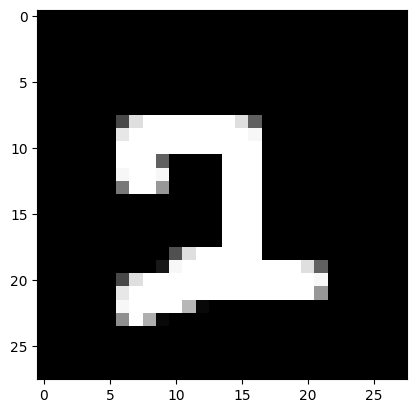

In [39]:
# 경로 설정
dir = os.getcwd()
imgPath = os.path.join(dir, 'num.png')

# 파일 읽기
nowImg = Image.open(imgPath)
print(nowImg)

# 28 x 28로 사이즈 변환
nowImg = nowImg.resize((28, 28))
myImg = np.asarray(nowImg) # array형식으로 형 변환

# 컬러이미지의 경우 RGB 평균값으로 바꾸기
try:
  myImg = np.mean(myImg, axis=2)
except:
  pass

# 이미지의 RGB평균을 절대값으로 계산해서 다시 이미지에 넣는 작업
myImg = np.abs(255 - myImg)
myImg = myImg.astype(np.float32) / 255.

plt.imshow(myImg, 'gray')
plt.show()

In [41]:
# shape의 변경해서 학습된 model과 비교
myImg = np.reshape(myImg, (1, 28, 28))
print(model.predict(myImg))

print('Model이 예측한 값은 {} !!'.format(np.argmax(model.predict(myImg))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1.6255079e-11 5.1654014e-03 9.9279284e-01 1.9662867e-03 9.8298184e-12
  7.9530018e-06 2.4147049e-09 1.3272611e-06 6.6175140e-05 2.5892122e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Model이 예측한 값은 2 !!
